In [ ]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import  *
import matplotlib.image as mpimg
from skimage import io
from PIL import Image
import cv2
import math
import soundfile as sf
from numba import jit
import IPython
from scipy.spatial import distance

Questão 1.1

In [ ]:
@jit
def DCT(x):  
    N = len(x)
    X = np.zeros(N)

    for k in range(N):
        s = 0

        if (k == 0):
            ck = sqrt(1.0/2.0)
        else:
            ck = 1.0
            
        for n in range(N):
            s += x[n] * cos((2.0*pi*(k/(2.0*N)*n))+((k*pi)/(2.0*N)))
            
        X[k] = sqrt(2.0/N)*s*ck 

    return X


In [ ]:
@jit
def IDCT(X):  
    N = len(X) 
    x = np.zeros(N)
    for n in range(N):
        sum = 0.0 
        for k in range(N):
            if (k == 0):
                ck = sqrt(0.5)
            else:
                ck = 1.0
    
            sum += X[k] * ck * cos((2.0*pi*(k/(2.0*N)*n))+((k*pi)/(2.0*N)))
            
        x[n] = sqrt(2.0/N)*sum
            
    return x

In [ ]:
img = io.imread('lena256.png')

N = len(img)  
img_DCT = np.zeros(img.shape)
img_AC = np.zeros(img.shape)

for i, linha in enumerate(img):
    img_DCT[i] = DCT(linha)
    
img_DCT = img_DCT.transpose()

for i, linha in enumerate(img_DCT):
    img_DCT[i] = DCT(linha)

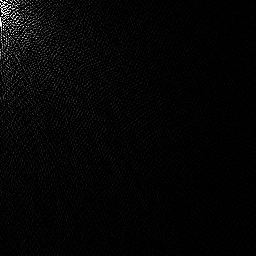

In [ ]:
dct_image = Image.fromarray(img_DCT)
dct_image = dct_image.convert("P")
# im.save("DCT.png")
display(dct_image)

In [ ]:
dc = img_DCT[0][0]
print("Valor DC:")
print(dc)

Valor DC:
31883.609375000007


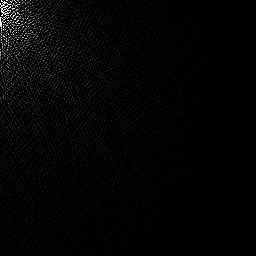

In [ ]:
img_AC = img_DCT.copy()
img_AC[0][0] = 0

ac_image = Image.fromarray(img_AC)
ac_image = ac_image.convert("P")
display(ac_image)

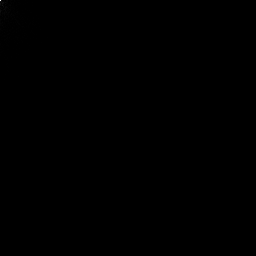

In [ ]:
norm_DCT = img_DCT.copy()
norm_DCT = abs(norm_DCT)
norm_DCT = norm_DCT * 255.0/norm_DCT.max()
#norm_DCT = 255- norm_DCT
dct_image = Image.fromarray(norm_DCT)
dct_image = dct_image.convert("P")
#dct_image.save("DCT.png")
display(dct_image)

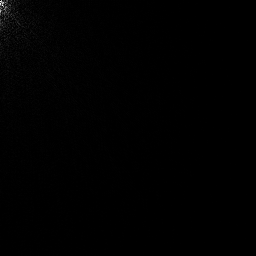

In [ ]:
norm_AC = img_AC.copy()
norm_AC = abs(norm_AC)
norm_AC = norm_AC * 255.0/img_AC.max()

ac_image = Image.fromarray(norm_AC)
ac_image = ac_image.convert("P")
display(ac_image)

Questão 1.2

In [ ]:
n = 50 # n_max = 65535  #Substituição dos valores que não são importantes por zero
flat_AC = img_AC.flatten()
index = np.abs(flat_AC).argsort()[:len(flat_AC)-n] #RC-N

In [ ]:
for i in range (0, len(flat_AC)):
    if(i in index):
        flat_AC[i]=0

In [ ]:
img_final = flat_AC.reshape(img_AC.shape)
img_final[0][0] = dc

img_IDCT = np.zeros(img_final.shape)

for i, linha in enumerate(img_final):
    img_IDCT[i] = IDCT(linha)
    
img_IDCT = img_IDCT.transpose()

for i, linha in enumerate(img_IDCT):
    img_IDCT[i] = IDCT(linha)

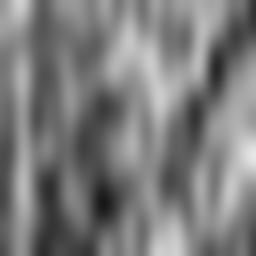

In [ ]:
idct_image = Image.fromarray(img_IDCT)
idct_image = idct_image.convert("P")
display(idct_image)

Questão 2

In [ ]:
def butterworth_filter_img(x,fc,n):
    
    N = len(x)
    out = np.zeros(x.shape)

    for i in range(N):
        for j in range(N):

            out[i][j] = x[i][j] * (1/(sqrt(1+(pow((distance.euclidean((i,j), (0,0))/fc),(2*n))))))

    return out

In [ ]:
#Leitura da imagem
img = io.imread('lena256.png')

#Parametros iniciais
N = len(img)  
img_DCT = np.zeros(img.shape)
img_AC = np.zeros(img.shape)

for i, linha in enumerate(img):
    img_DCT[i] = DCT(linha)
    
img_DCT = img_DCT.transpose()

for i, linha in enumerate(img_DCT):
    img_DCT[i] = DCT(linha)

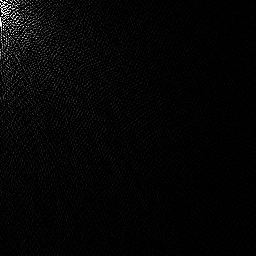

In [ ]:
dct_image = Image.fromarray(img_DCT)
dct_image = dct_image.convert("P")
display(dct_image)

In [ ]:
filtred_img = np.zeros(img_DCT.shape)

fc = 50
n = 8

filtred_img = butterworth_filter_img(img_DCT, fc, n)

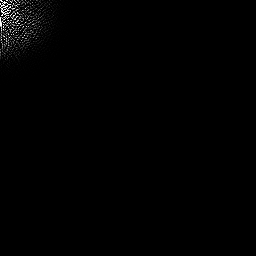

In [ ]:
filtred_image = Image.fromarray(filtred_img)
filtred_imgage = filtred_image.convert("P")
# im.save("DCT.png")
display(filtred_imgage)

In [ ]:
img_IDCT = np.zeros(filtred_img.shape)

for i, linha in enumerate(filtred_img):
    img_IDCT[i] = IDCT(linha)
    
img_IDCT = img_IDCT.transpose()

for i, linha in enumerate(img_IDCT):
    img_IDCT[i] = IDCT(linha)

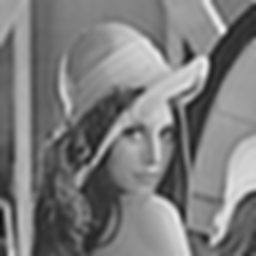

In [ ]:
idct_filtred = Image.fromarray(img_IDCT)
idct_filtred = idct_filtred.convert("P")
display(idct_filtred)

Questão 3


In [ ]:
@jit
def butterworth_filter_audio(x, samplerate, fc,n):
    
    N = len(x)
    f1 = samplerate/(2*(N-1))
    x_hertz = []

    out = np.zeros(N)

    for k in range(N):
        out[k] = x[k] * (1/(sqrt(1+(pow(((f1*k)/fc),(2*n))))))
        x_hertz.append(k*f1)

    return out, x_hertz

Text(0, 0.5, 'Amplitude')

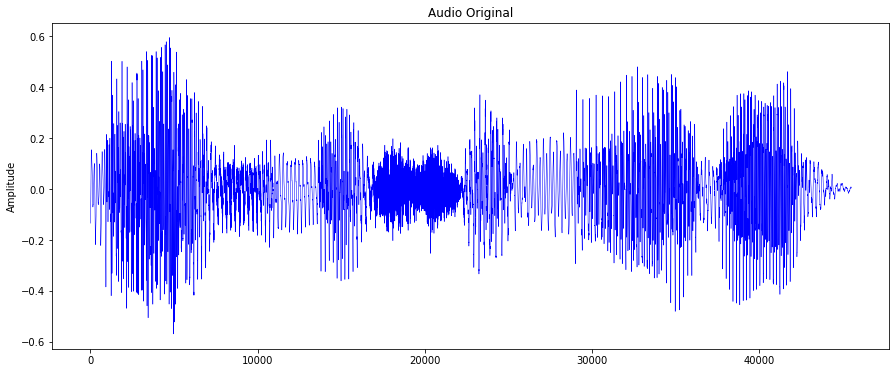

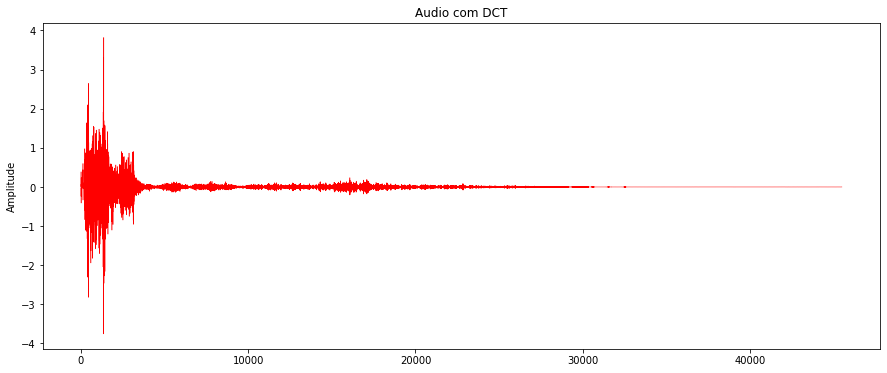

In [ ]:
signal, samplerate = sf.read('MaisUmaSemana.wav')

plt.figure('signal', figsize=[15,6])
plt.plot(signal, linewidth=0.5,alpha=1,color="blue")
plt.title("Audio Original")
plt.ylabel("Amplitude")

signal_DCT = DCT(signal)

plt.figure('signal_DCT', figsize=[15,6])
plt.plot(signal_DCT, linewidth=0.5,alpha=1,color="red")
plt.title("Audio com DCT")
plt.ylabel("Amplitude")

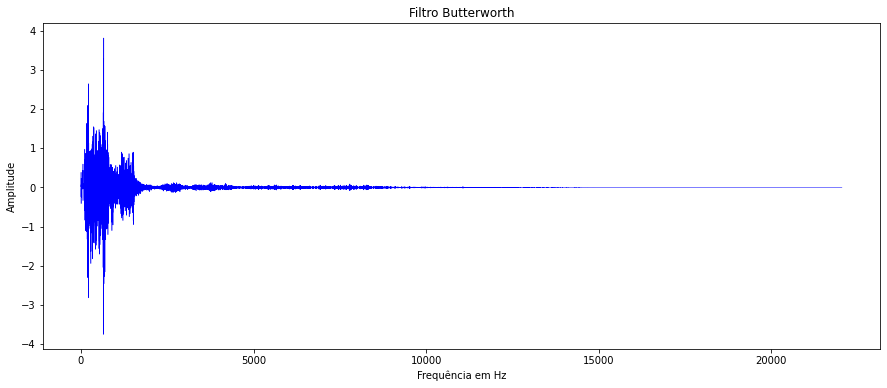

In [ ]:
filtred_signal = np.zeros(signal_DCT.shape)
x_hertz = []
fc = 5000
n = 2

filtred_signal , x_hertz = butterworth_filter_audio(signal_DCT, samplerate, fc, n)

plt.figure('filtred_signal', figsize=[15,6])
plt.plot(x_hertz, filtred_signal, linewidth=0.5,alpha=1,color="blue")
plt.title("Filtro Butterworth")
plt.ylabel("Amplitude")
plt.xlabel("Frequência em Hz")
plt.show()

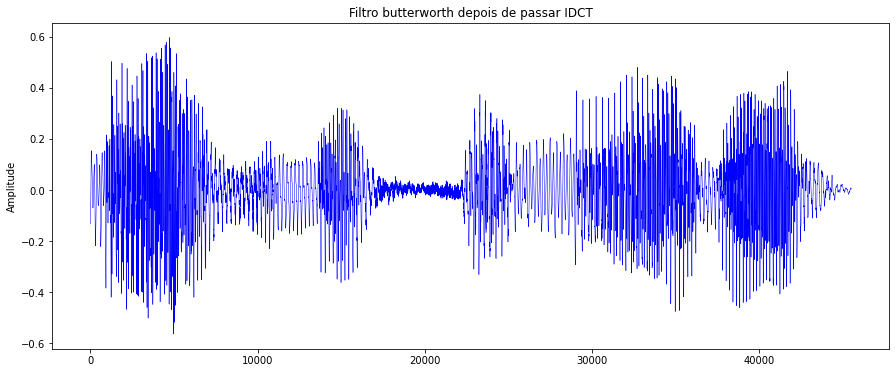

In [ ]:
signal_IDCT = np.zeros(filtred_signal.shape)
signal_IDCT = IDCT(filtred_signal)

plt.figure('signal_idct', figsize=[15,6])
plt.plot(signal_IDCT, linewidth=0.5,alpha=1,color="blue")
plt.title("Filtro butterworth depois de passar IDCT")
plt.ylabel("Amplitude")
plt.show()

sf.write('MaisUmaSemana(filtrado).wav', signal_IDCT, samplerate)

In [ ]:
import IPython

IPython.display.Audio('MaisUmaSemana.wav')

In [ ]:
IPython.display.Audio('MaisUmaSemana(filtrado).wav')